In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("C:/Users/Tim/Desktop/lighthouse/w4\d2/mini-project-III-data/twm_customer.csv",sep=';')

In [3]:
df.dtypes

cust_id             int64
income              int64
age                 int64
years_with_bank     int64
nbr_children        int64
gender             object
marital_status      int64
name_prefix        object
first_name         object
last_name          object
street_nbr          int64
street_name        object
postal_code         int64
city_name          object
state_code         object
dtype: object

In [4]:
df.describe()

,cust_id,income,age,years_with_bank,nbr_children,marital_status,street_nbr,postal_code
count,7.470000e+02,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000,747.000000
mean,1.362991e+06,22728.281124,42.479250,3.907631,0.714859,1.882195,8523.109772,59502.690763
std,2.925255e+02,22207.221405,19.114879,2.675634,1.103410,0.892051,5219.488263,31205.926508
min,1.362480e+06,0.000000,13.000000,0.000000,0.000000,1.000000,196.000000,2149.000000
25%,1.362732e+06,7118.500000,28.000000,2.000000,0.000000,1.000000,4295.500000,33145.000000
50%,1.362993e+06,17242.000000,42.000000,4.000000,0.000000,2.000000,8001.000000,64132.000000
75%,1.363244e+06,31338.000000,56.000000,6.000000,1.000000,2.000000,12039.000000,90082.000000
max,1.363495e+06,144157.000000,89.000000,9.000000,5.000000,4.000000,19940.000000,98186.000000


In [5]:
df.head()

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY


In [6]:
def missing(x):
    n_missing = x.isnull().sum().sort_values(ascending=False)
    p_missing = (x.isnull().sum()/x.isnull().count()).sort_values(ascending=False)
    missing_ = pd.concat([n_missing, p_missing],axis=1, keys = ['number','percent'])
    return missing_
missing(df)

,number,percent
state_code,0,0.0
city_name,0,0.0
postal_code,0,0.0
street_name,0,0.0
street_nbr,0,0.0
last_name,0,0.0
first_name,0,0.0
name_prefix,0,0.0
marital_status,0,0.0
gender,0,0.0


In [51]:
import geocoder

#https://stackoverflow.com/questions/52450422/how-to-get-coordinates-from-postal-codes-and-add-them-into-df-using-a-loop

# # initialize your variable to None
# lat_lng_coords = None

# loop until you get the coordinates
# while(lat_lng_coords is None):
#     asdf = geocoder.google("{}, {}, {}, {}".format(df['street_nbr'],df['street_name'],df['city_name'],df['state_code']))
#     lat_lng_coords = asdf.latlng
#   asdf = geocoder.google('{}, {}, {}'.format(df['postal_code'],df['city_name'],df['state_code']))
#   lat_lng_coords = asdf.latlng

def get_geocoder(postal_code_from_df):
     # initialize your variable to None
    lat_lng_coords = None
     # loop until you get the coordinates
    while(lat_lng_coords is None):
        g = geocoder.google("{}".format(postal_code_from_df))
        lat_lng_coords = g.latlng
    latitude = lat_lng_coords[0]
    longitude = lat_lng_coords[1]
    return latitude,longitude

# latitude = lat_lng_coords[0]
# longitude = lat_lng_coords[1]

# get_geocoder(df)

In [ ]:
#df['latitude'], df['longitude'] = zip(*df['postal_code'].apply(get_geocoder))

# for i in range(0,len(df)):
#     df['Latitude'][i],df['Longitude'][i]=get_geocoder(df.iloc[i]['postal_code'])

df['Latitude'], df['Longitude'] = get_geocoder(df['postal_code'].values)

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

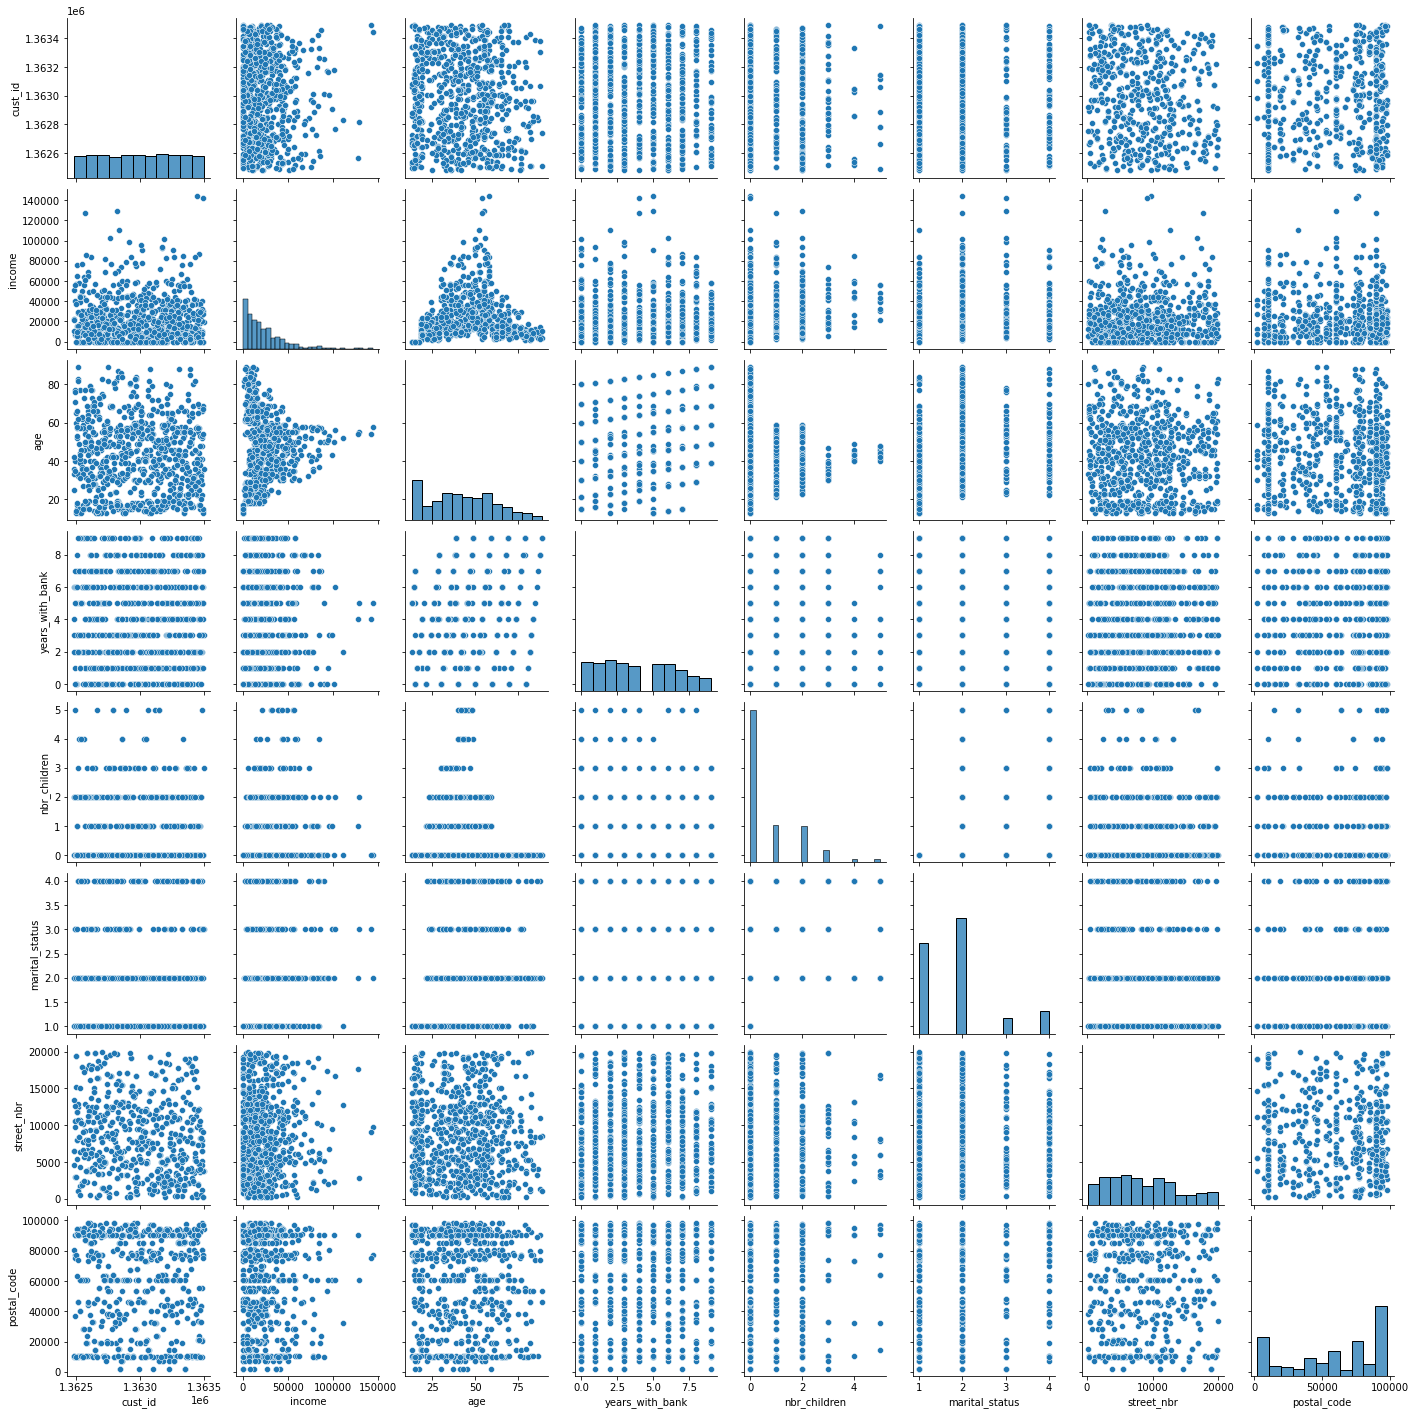

In [9]:
sns.pairplot(df)

<AxesSubplot:>

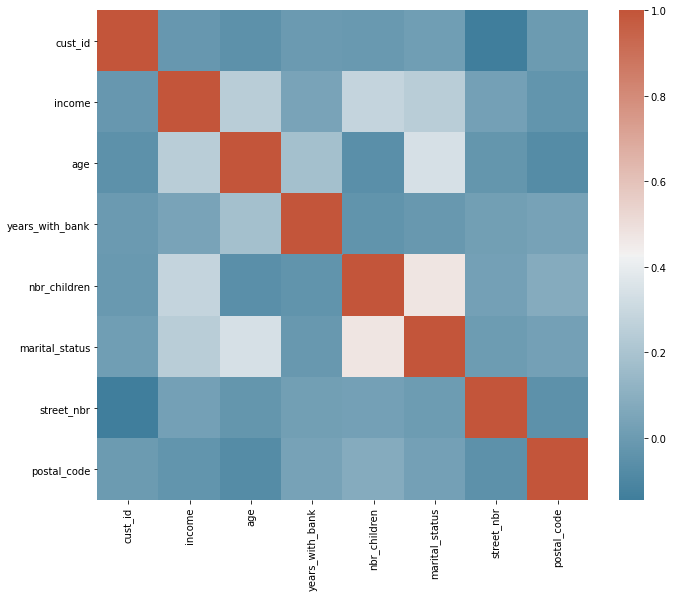

In [10]:
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(df.corr(), cmap=cmap)

In [34]:
import copy
data = copy.deepcopy(df)

In [35]:
df.dtypes

cust_id             int64
income              int64
age                 int64
years_with_bank     int64
nbr_children        int64
gender             object
marital_status      int64
name_prefix        object
first_name         object
last_name          object
street_nbr          int64
street_name        object
postal_code         int64
city_name          object
state_code         object
dtype: object

In [36]:
drop = [
    "years_with_bank",
    "name_prefix",
    "first_name",
    "last_name",
    "street_nbr",
    "street_name",
    "postal_code",
    "city_name",
    "state_code"
]

data = data.drop(columns=drop)

In [37]:
data = pd.concat([data, pd.get_dummies(data['gender'],drop_first=True,dtype=int)],axis=1)

In [38]:
data.dtypes

cust_id            int64
income             int64
age                int64
nbr_children       int64
gender            object
marital_status     int64
M                  int32
dtype: object

In [41]:
data = data.drop(columns='gender')
data.head()

,cust_id,income,age,nbr_children,marital_status,M
0,1362691,26150,46,1,2,1
1,1362487,6605,71,0,2,1
2,1363160,18548,38,0,1,0
3,1362752,47668,54,0,1,0
4,1362548,44554,59,2,4,0


In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(data)

data_scale = pd.DataFrame(scaler.transform(data),columns = data.columns)

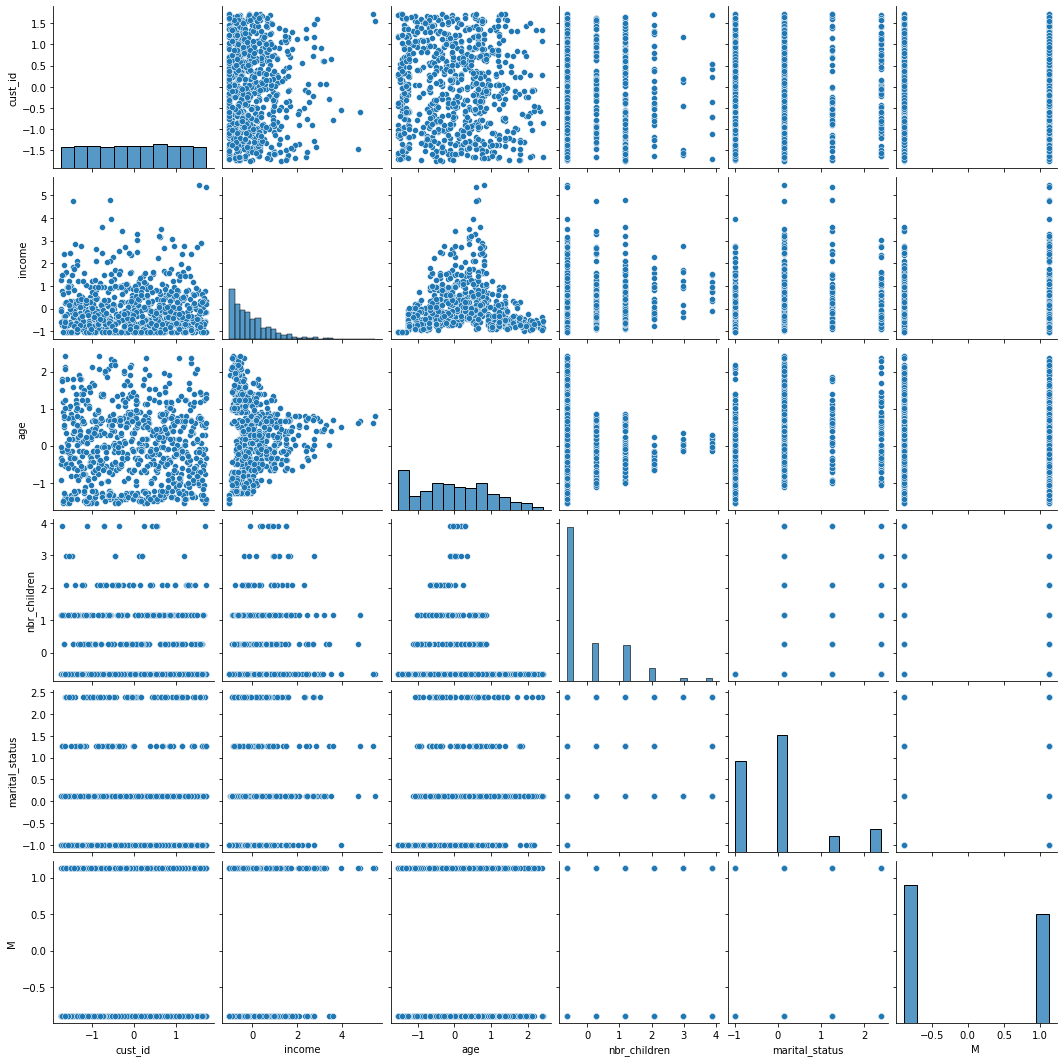

In [43]:
sns.pairplot(data_scale)

In [ ]:
from sklearn.preprocessing import normalize
from sklearn.preprocessing import Normalizer

n = Normalizer()
n.fit(data)
data_norm = pd.DataFrame(n.transform(data),columns = data.columns)